# Assessing orphaned wells in NY

**Data source:**
[Orphaned Wells](https://data.ny.gov/Energy-Environment/Orphaned-Wells/vgue-bamz): "List of wells that are regulated under the Oil, Gas and Solution Mining Law (ECL Article 23) in New York State that are orphaned and not plugged," Last Updated: 12/16/21 | Downloaded: 3/25/22

In this notebook, we are breaking down orphaned wells in New York by region, county and town. 

**Key terminology:**

'Orphaned wells' and 'abandoned wells' are **NOT** the same thing. It's also important to note that the definitions of these types of wells can vary state by state. Here's a brief explanation of how the NY DEC defines the two. For more info, [click here](https://www.dec.ny.gov/energy/111211.html#:~:text=Orphaned%20and%20Abandoned%20Wells&text=Orphaned%20wells%20are%20a%20subset,regulatory%20framework%20in%20New%20York)
* Abandoned wells: "Abandoned wells are unplugged wells (primarily oil or gas wells) that have not been operated and maintained in accordance with prevailing statute and regulation."
* Orphaned wells: "Orphaned wells are a subset of abandoned wells for which no owner can be determined."

In other words, all orphaned wells are abandoned wells, but not all abandoned wells are orphaned wells.


In [1]:
#Import pandas
from __future__ import print_function

import pandas as pd
pd.__version__

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


'1.3.4'

In [2]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data_3_25_22/data_raw_32522/wells_orphaned_32522.csv")
#Replace spaces in column names and change to lowercase
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [4]:
df.columns

Index(['company_name', 'county', 'town', 'api_well_number', 'well_name',
       'well_status', 'well_type_code', 'surface_longitude',
       'surface_latitude', 'verified_location', 'region', 'georeference'],
      dtype='object')

**Reference note:** It seems the DEC has updated their dataset since we last downloaded in Oct. 2021. Previously, the below column called for 'WELLSTATUSCODE', but the values referenced in this column are now reflected in the 'well_status' column.

# 1. Looking at wells by status:

[Data dictionary here](https://data.ny.gov/Energy-Environment/Orphaned-Wells/vgue-bamz)

* UN: well status unknown, but detail on location, etc, provided to DEC through misc. means
* UL: well status unknown, but well located and inspection performed
* UM: well status unknown, DEC was unable to locate the well

For now, we want to filter out wells the DEC has NOT been able to locate. 

**Conclusions as of 3/25/22:**
* There are 6,808 known orphaned wells in New York state. 
* There are 4,649 wells that have been successfully located by the DEC, but have an unknown status. These wells remain unplugged. 
* There are 2,159 wells the DEC knows to exist, but has yet to locate. These wells are also unplugged. 

In [5]:
df.well_status.value_counts()
#UN: well status unknown, but detail on location, etc, provided to DEC through misc. means
#UL: well status unknown, but well located and inspection performed
#UM: well status unknown, DEC was unable to locate the well

UN    2337
UL    2312
UM    2159
Name: well_status, dtype: int64

In [6]:
# Filtering out wells the DEC was unable to locate
df_located = df[df['well_status']!='UM']

In [7]:
len(df_located)

4649

In [8]:
# Number of total orphaned wells in the state
len(df)

6808

**Reference note:** Since our last download in Oct. 2021, the DEC has located over 60 wells. 

# 2. Counting wells by NY DEC Region 

Here, we look at the distribution of orphaned wells by the regions in the state, determined by the DEC (more info [here](https://www.dec.ny.gov/about/558.html) and [here](https://www.dec.ny.gov/about/76070.html))

**Conclusions as of 3/25/22:**
* Region 9, or Western NY has the most orphaned wells at 3,815 **(82 percent of the orphaned wells in the state)**
* Region 8, or the Finger Lakes, is a distant second with 558 orphaned wells 

In [9]:
# Counting number of wells in each region
wells_region = df_located.region.value_counts().rename_axis('region').reset_index(name='count')
wells_region

,region,count
0,9,3815
1,8,558
2,7,217
3,6,48
4,4,7
5,5,3
6,3,1


<AxesSubplot:title={'center':'Count of orphaned wells by NYDEC Region'}, xlabel='region'>

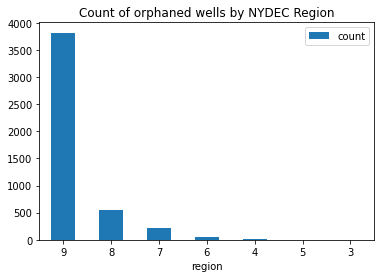

In [10]:
# Visualization of well count by region in New York
wells_region.plot.bar(x='region', y='count', rot=0, title='Count of orphaned wells by NYDEC Region')

In [11]:
# Calculating percentage of wells in each NYSDEC region
df_located.region.value_counts(normalize=True)

9    0.820607
8    0.120026
7    0.046677
6    0.010325
4    0.001506
5    0.000645
3    0.000215
Name: region, dtype: float64

# 3. Counting wells by county

Now, we're taking a look at the distribution of orphaned wells by county. 

**Conclusions as of 3/25/22:**
* Allegany County has the majority of orphaned wells in the state at 2,324 **(49.9 percent of the orphaned wells in the state)**
* Cattaraugus County is in second at 1,083 orphaned wells (23.23 percent of the orphaned wells in the state) 
* Steuben County is in third at 421 orphaned wells (9 percent of the orphaned wells in the state)
* These three counties account for over 80 percent (82.3 percent) of the orphaned wells in the state

In [12]:
# Count number of wells in each county
wells_county = df_located.county.value_counts().rename_axis('county').reset_index(name='count')
wells_county.head(10)

,county,count
0,Allegany,2324
1,Cattaraugus,1083
2,Steuben,421
3,Erie,248
4,Chautauqua,127
5,Oswego,110
6,Ontario,43
7,Tompkins,36
8,Oneida,33
9,Wyoming,30


In [13]:
# Percentage split of orphaned wells by county 
df_located.county.value_counts(normalize=True).head(10)

Allegany       0.499892
Cattaraugus    0.232953
Steuben        0.090557
Erie           0.053345
Chautauqua     0.027318
Oswego         0.023661
Ontario        0.009249
Tompkins       0.007744
Oneida         0.007098
Wyoming        0.006453
Name: county, dtype: float64

In [14]:
# The top 3 counties with orphaned wells account for 82% of the orphaned wells in the state
df_located.county.value_counts(normalize=True).head(3).sum()

0.8234028823402882

In [15]:
#Download CSV of number of unplugged and abandoned wells in each county
wells_county.to_csv('data_3_25_22/data_processed_32522/unplug_orphaned_32522.csv', index=False) 

In [16]:
# Calculating percent of wells in each county
# df_located.county.value_counts(normalize=True)

# 3. Counting wells by town

And finally, we're looking at the distribution of orphaned wells by town. 

**Conclusions as of 3/25/22:**
* Bolivar has the most orphaned wells at 1,079 (24.3 percent of orphaned wells in the state)
* Allegany is second with 886 orphaned wells (19.9 percent of orphaned wells in the state)

In [17]:
# Calculating number of wells in each town
wells_city = df_located.town.value_counts().rename_axis('city').reset_index(name='count')
wells_city.head(25)

,city,count
0,Bolivar,1079
1,Allegany,886
2,Wirt,356
3,West Union,340
4,Alma,339
5,Genesee,160
6,Scio,86
7,Carrollton,77
8,Collins,56
9,Sandy Creek,52


In [18]:
# Calculating percent of wells in each town

df_located.town.value_counts(normalize=True).head(25)

Bolivar        0.243457
Allegany       0.199910
Wirt           0.080325
West Union     0.076715
Alma           0.076489
Genesee        0.036101
Scio           0.019404
Carrollton     0.017374
Collins        0.012635
Sandy Creek    0.011733
Brant          0.010830
Richland       0.008123
Busti          0.008123
Olean          0.007220
Clarksville    0.006769
Perrysburg     0.006543
Red House      0.006318
Sheridan       0.005866
Alden          0.005866
UNK            0.004287
Hanover        0.004287
Tonawanda      0.003836
Willing        0.003836
Lancaster      0.003836
Camden         0.003836
Name: town, dtype: float64